Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²): 0.58

Model Coefficients:
MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64


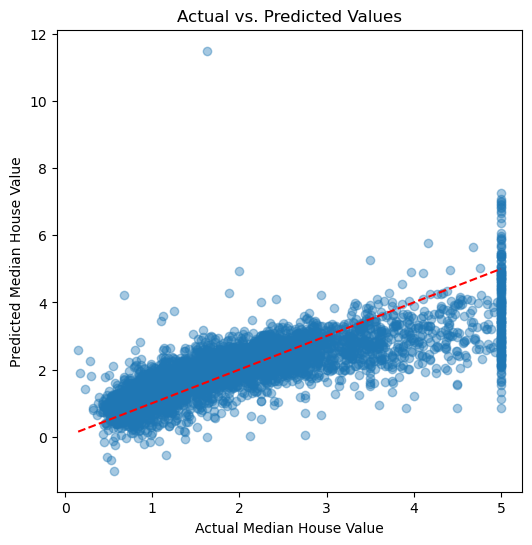

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

# Optional: Convert to DataFrame for better analysis and visualization (optional)
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y
df.head()

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Optional: View model coefficients
coefficients = pd.Series(model.coef_, index=feature_names)
print("\nModel Coefficients:")
print(coefficients)

# Optional: Plot predicted vs actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()
